# COGS 108 - Final Project 

# Overview

Our project seeks to investigate the connections between the different attributes of Pokemon, particularly in relation to type. In order to make these connections, we organized our data and created graphs that visually display our results. Additionally, we trained a supervised model to try to classify Pokemon based on type. 

# Names

- Kevin Cao
- Mark Lee
- Christopher Liu
- Chloe Park
- Tiffany Wu


# Research Question

What is the best predictor for Pokemon types?  
Do types influence the attributes assigned to a Pokemon?  
Can we accurately/consistently predict a Pokemon’s types given its attributes?

## Background and Prior Work

Pokemon is a video game series with the objective of collecting and training creatures in order to battle other individuals with their own creatures. According to Nintendo, the creators of Pokemon, “Pokémon are creatures of all shapes and sizes who live in the wild or alongside humans” (1). For each pokemon, the trainer is able to level them up through fighting other pokemon, and when they reach a particular level, they are able to evolve into another form that is superior to that previous form. This idea is adopted from the ideology of evolution that essentially describes animals as evolving from a weaker form into something bigger and stronger. However, not all pokemon are able to evolve into a new stage because some are considered “legendary”, which means they are extremely powerful and rare to obtain, and other pokemon merely remain in one form. 

The Pokemon universe has become very extensive due to the various games that have been released with their own set of pokemon. The objective of most of the Pokemon games is for the trainers to “undertake adventures with their Pokémon in search of new types of Pokémon to add to their collection, participate in battles with other Trainers and Gym Leaders to obtain Gym Badges and to explore mystical new lands.” The game ends when the best pokemon trainer in the world is defeated. However, this is not a seemingly easy task because the level of the Pokemon is not the only factor to be considered, but also the type. There are eighteen different types (2), and each type has their own strengths and weaknesses. For example, a water type is effective against a fire type but is very weak against a grass type. Pokemon trainers take this into consideration when they are up against a foe, and they will use the respective pokemon that has a type that is effective against their foe. Therefore, the game consists of a lot of strategy as well. 

Thus, as strategy is very important in the realm of competitive Pokemon matches, one may begin to wonder if certain stats are correlated to a Pokemon's types. Though there are eighteen different types, Pokemon are capable of having not just a primary type, but additionally a secondary type. This means that there is 324 (18\*17 + 18) type combinations, accounting for the fact that a primary-secondary pair is not the same pair when the types flipped, and for singular-typed pokemon (3). Many of these combinations are not used in the dataset, as well as many combinations only have a single observation in the dataset. Currently, there are 890 Pokemon that exist as of 2020, many of which have different forms, bringing the total unique creatures to 1028. However, we would hope that our classifier is able to distinguish areas where features correlate most to a type. Practically, a question we want to be able to solve may be, "if I would like a Pokemon with the most attack, is there a set of Pokemon from a type combination I should check first?" 

There has been prior work done on attempting to create a similar type predictor found here: https://github.com/kn-kn/pokemon-type-prediction. However, this model is based on an outdated dataset, in that it does not analyze many of the Pokemon released in the latest generations as well as that the dataset itself had less features in it. Additionally, the model somewhat naively assumes that every feature should be included without doing an analysis on the features itself, but rather analyzing types over generations and removing some types without many data points (flying). He also didn't normalize the data across Pokemon, meaning that some Pokemon had significantly greater stats than others. Our approach will be significantly different in this sense.

References (include links):
- 1) Official Pokemon Definition: https://www.nintendo.com.au/what-is-pokemon 
- 2) Information on Pokemon Types: https://bulbapedia.bulbagarden.net/wiki/Type 
- 3) Examples for Type Combinations: https://bulbapedia.bulbagarden.net/wiki/List_of_type_combinations_by_abundance

# Hypothesis


We predict that there is indeed a trend for the attributes assigned to Pokemon based on Pokemon type, especially its stat distribution. Our reasoning for these correlations is that attributes are assigned to a Pokemon with its overall design taken into account. There is a common real-world association that can come with Pokemon types, which could impact the way that Pokemon are created. For example, bugs are generally small, so it could be that Bug-type Pokemon are more likely to be shorter and weigh less. Steel is hard and sturdy, so it would make sense that Steel-type Pokemon tend to have higher defense.

# Dataset

**Dataset 1**:
- Name: Complete Pokemon Dataset  
- Link: https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420
- Observations: 1028
- Description: This dataset contains comprehensive information on all 890 Pokemon from generations 1-8 as well as their varieties. This includes their pokedex number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. Most of the data comes from https://pokemondb.net/, while information on status comes from https://serebii.net/. Some specific descriptions of the features are:  
pokedex_number: National pokedex number for each pokemon  
name: Name of each pokemon  
type_1: Each pokemon has a type, this determines weakness/resistance to attacks  
type_2: Some pokemon are dual type and have 2  
height_m: The height of each pokemon in meters  
weight_kg: The weight of each pokemon in kilograms  
total_points: Sum of all stats that come after this, a general guide to how strong a pokemon is  
hp: Hit points, or health, defines how much damage a pokemon can withstand before fainting  
attack: The base modifier for normal attacks (eg. Scratch, Punch)  
defense: The base damage resistance against normal attacks  
sp_attack: Special attack, the base modifier for special attacks (e.g. Fire Blast, Bubble Beam)  
sp_defense: The base damage resistance against special attacks  
speed: Determines which pokemon attacks first each round  

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [3]:
df = pd.read_csv('pokedex_(Update_05.20).csv')
print(df.shape)
pd.set_option('display.max_columns', None)

(1028, 51)


In [4]:
# Print first few data points to see example data
df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [5]:
# Print last few data points to see example data
df.tail()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,2.8,110.0,1,Intrepid Sword,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,1,Dauntless Shield,NaN,NaN,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,2.9,210.0,1,Dauntless Shield,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


The dataset is initially pretty clean, so all we have to do remove specific features that are related to distinguishing type as well as features that were not available in every generation. Additionally from the tail data we can see that many of the extra forms of Pokemon are missing features, most likely due to them not being specific Pokemon. Thus, we should probably remove extra forms of Pokemon. We will also remove features that were purely extraneous in that they are text descriptions that basically are another way to label a specific Pokemon.

## Removing extraneous data

First, we remove entries containing the different forms (like Mega Evolutions and regional forms), to avoid complications.

In [6]:
# Remove pokemon with duplicate pokedex_number
df = df.drop_duplicates(subset='pokedex_number', keep="first")
# Use Pokedex number as index
df = df.set_index('pokedex_number')
print(df.shape)

(890, 50)


We will remove features that are unrelated to finding types and are just alternative labels for specific Pokemon.

In [7]:
# Remove different names, as well as species and pokedex_number
df = df.drop(columns=['Unnamed: 0','japanese_name','german_name','species'])
print(df.shape)

(890, 46)


We will drop the `'against_'` columns, since these numbers are the same for every Pokemon of the same types, practically directly signifying types.  
Additionally, a Pokemon's abilities are also mostly unique to a Pokemon type, so these should be dropped.  
Lastly, egg_type can also be related to type (i.e. the grass egg group is almost exclusively comprised of grass-type Pokemon), so this feature should be dropped.

In [8]:
# Remove type correlating columns
df = df.drop(columns=df.iloc[:, -18:]) # Remove against_ columns
df = df.drop(columns=['ability_1', 'ability_2','ability_hidden','egg_type_1', 'egg_type_2'])
print(df.shape)

(890, 23)


For the last passthrough of the data, we check to see if there are data points that have features missing.

In [9]:
# Check which columns have missing values
df.isnull().any()

name                False
generation          False
status              False
type_number         False
type_1              False
type_2               True
height_m            False
weight_kg           False
abilities_number    False
total_points        False
hp                  False
attack              False
defense             False
sp_attack           False
sp_defense          False
speed               False
catch_rate           True
base_friendship      True
base_experience      True
growth_rate         False
egg_type_number     False
percentage_male      True
egg_cycles          False
dtype: bool

(187, 22)

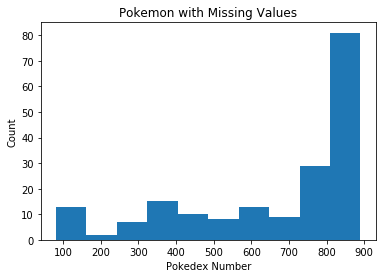

In [10]:
# Obtain which entries contain missing values
df_na = df.drop('type_2', axis=1).isnull() # Not including type_2
df_na = df_na[df_na.any(axis=1)]
plt.hist(df_na.index)
plt.title("Pokemon with Missing Values")
plt.xlabel("Pokedex Number")
plt.ylabel("Count")
df_na.shape


As most of the missing values are related to later Pokemon, we will decide to just not consider catch rate, base friendship, base experience, and gender ratio in our investigation. Additionally, many of these features seem to not have any specific trend off first analysis.

In [11]:
df = df.drop(columns=['catch_rate', 'base_friendship', 'base_experience', 'percentage_male'])

## Standardizing data

In [12]:
df.dtypes

name                 object
generation            int64
status               object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
total_points        float64
hp                  float64
attack              float64
defense             float64
sp_attack           float64
sp_defense          float64
speed               float64
growth_rate          object
egg_type_number       int64
egg_cycles          float64
dtype: object

In [13]:
print('status\n {}'.format(df['status'].unique()))
print('type_1\n {}'.format(df['type_1'].unique()))
print('type_2\n {}'.format(df['type_2'].unique()))
print('growth_rate\n {}'.format(df['growth_rate'].unique()))

status
 ['Normal' 'Sub Legendary' 'Legendary' 'Mythical']
type_1
 ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
type_2
 ['Poison' nan 'Flying' 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic'
 'Steel' 'Ice' 'Rock' 'Water' 'Electric' 'Fire' 'Dragon' 'Dark' 'Ghost'
 'Bug' 'Normal']
growth_rate
 ['Medium Slow' 'Medium Fast' 'Fast' 'Slow' 'Fluctuating' 'Erratic']


The values in each non-numerical column are already standard, so nothing needs to be done.

## Preprocessing data

Because each Pokemon has different total base stat points, the values for each of the stats (HP, Attack, Defense, Special Attack, Special Defense, and Speed) cannot be compared from one Pokemon to another, which is why the proportions will be more useful.

In [14]:
# Divide each of the stat columns by total points
df['hp'] = df['hp'].divide(df['total_points'])
df['attack'] = df['attack'].divide(df['total_points'])
df['defense'] = df['defense'].divide(df['total_points'])
df['sp_attack'] = df['sp_attack'].divide(df['total_points'])
df['sp_defense'] = df['sp_defense'].divide(df['total_points'])
df['speed'] = df['speed'].divide(df['total_points'])

Here is the final cleaned data:

In [15]:
df = df.sort_index()
df

,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,egg_type_number,egg_cycles
pokedex_number,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,2,318.0,0.141509,0.154088,0.154088,0.204403,0.204403,0.141509,Medium Slow,2,20.0
2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,2,405.0,0.148148,0.153086,0.155556,0.197531,0.197531,0.148148,Medium Slow,2,20.0
3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,2,525.0,0.152381,0.156190,0.158095,0.190476,0.190476,0.152381,Medium Slow,2,20.0
4,Charmander,1,Normal,1,Fire,NaN,0.6,8.5,2,309.0,0.126214,0.168285,0.139159,0.194175,0.161812,0.210356,Medium Slow,2,20.0
5,Charmeleon,1,Normal,1,Fire,NaN,1.1,19.0,2,405.0,0.143210,0.158025,0.143210,0.197531,0.160494,0.197531,Medium Slow,2,20.0
6,Charizard,1,Normal,2,Fire,Flying,1.7,90.5,2,534.0,0.146067,0.157303,0.146067,0.204120,0.159176,0.187266,Medium Slow,2,20.0
7,Squirtle,1,Normal,1,Water,NaN,0.5,9.0,2,314.0,0.140127,0.152866,0.207006,0.159236,0.203822,0.136943,Medium Slow,2,20.0
8,Wartortle,1,Normal,1,Water,NaN,1.0,22.5,2,405.0,0.145679,0.155556,0.197531,0.160494,0.197531,0.143210,Medium Slow,2,20.0
9,Blastoise,1,Normal,1,Water,NaN,1.6,85.5,2,530.0,0.149057,0.156604,0.188679,0.160377,0.198113,0.147170,Medium Slow,2,20.0


# Data Analysis & Results

## Distribution Analysis

To determine the features that we will use for the following anaylsis, we will generate plots for columns that seem to have very little variation and validate whether they are useful or not.

In [16]:
# Convert the string columns to numerical values
def convert_status(status):
    if status == "Normal":
        return 1
    elif status == "Sub Legendary":
        return 2
    elif status == "Legendary":
        return 3
    elif status == "Mythical":
        return 4
    return status

def convert_growthrate(gr):
    if gr == "Slow":
        return 1
    elif gr == "Medium Slow":
        return 2
    elif gr == "Medium Fast":
        return 3
    elif gr == "Fast":
        return 4
    elif gr == "Fluctuating":
        return 5
    elif gr == "Erratic":
        return 6
    return gr

# Generate dataframes in which words are represented by numerical values
df['status'] = df['status'].apply(convert_status)
df['growth_rate'] = df['growth_rate'].apply(convert_growthrate)

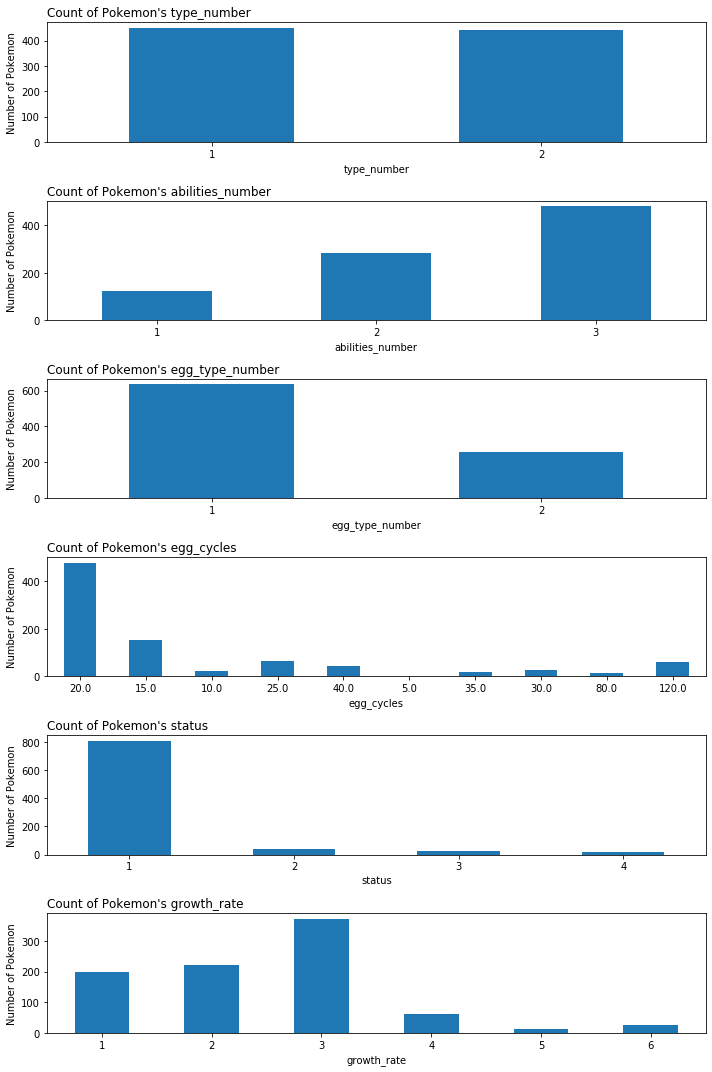

In [17]:
# We will first look at the features defined by numerical values
fig, axs = plt.subplots(6,1, figsize=(10, 15))

for i, feature in enumerate(['type_number', 'abilities_number', 'egg_type_number', 'egg_cycles', 'status', 'growth_rate']):
    df[feature].value_counts(sort=False).plot.bar(ax=axs[i], rot=0)
    axs[i].set_title("Count of Pokemon's " + feature, loc="left")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Number of Pokemon")

plt.tight_layout()

From the above plots, we see that they all should not be included in the analysis. For `type_number`, `abilites_number`, and `egg_type_number`, it is because of the lack of variation in data. Using a binary/trinary distribution to determine a spread out variable like `type` is not realistic. Additionally, these features actually simply count the non-null values of features we originally dropped during data cleaning, so it would make sense to remove these since the columns that they were related to were also dropped.

We will also not be considering `status`, `egg_cycles`, and `growth_rate`, because it is so heavily dominated by a single, or a very small number, of category(s). So the majority of the data will fall into those bins and thus make no difference to the prediction.

And so we will be dropping these items from the dataframe.

In [18]:
df = df.drop(['type_number', 'abilities_number', 'egg_type_number', 'egg_cycles', 'status', 'growth_rate'], axis=1)

Now that we have narrowed down the features for the classifier, we can take a look at the distributions.

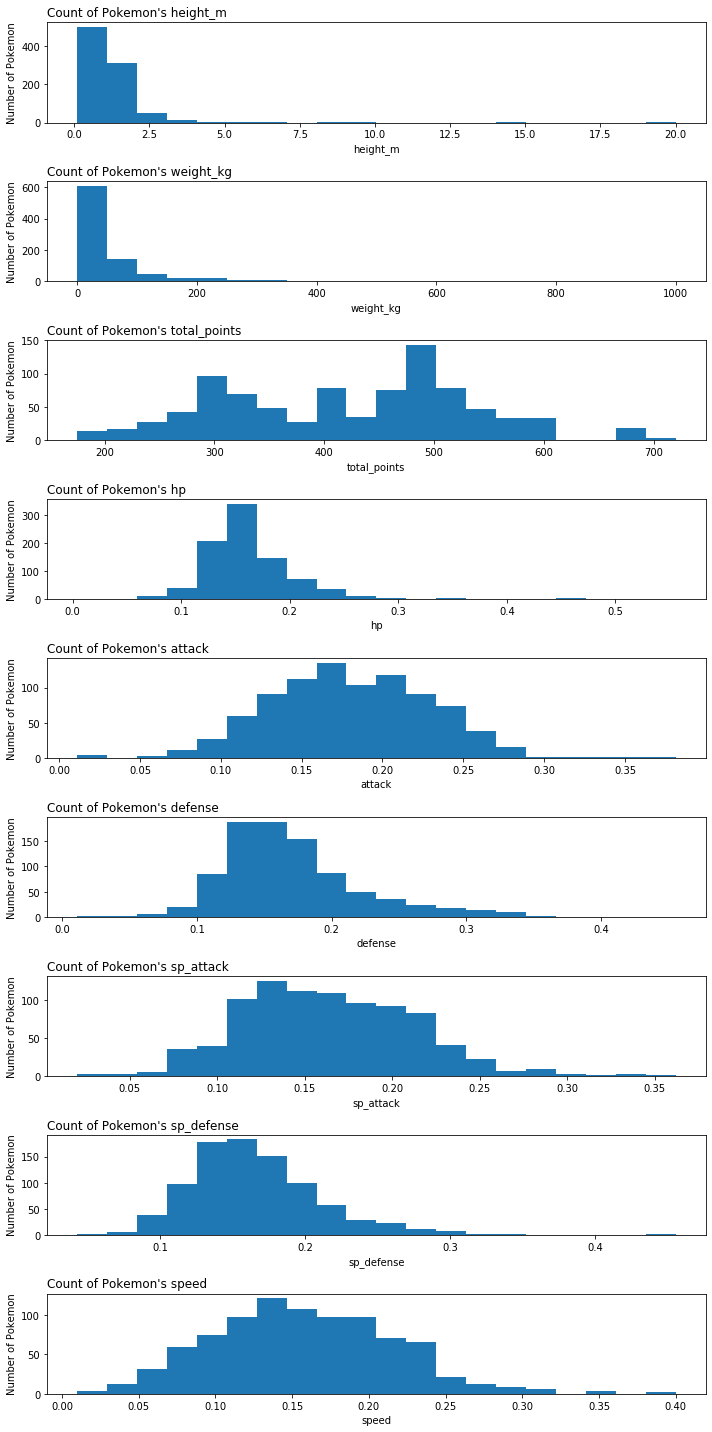

In [19]:
fig, axs = plt.subplots(9,1, figsize=(10,20))

bins = 20
for i, feature in enumerate(['height_m', 'weight_kg', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']):
    df[feature].hist(grid=False, ax=axs[i], bins=bins)
    axs[i].set_title("Count of Pokemon's " + feature, loc="left")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Number of Pokemon")

plt.tight_layout()

We can see that height and weight are very left skewed with a few outliers (which can be seen in more detail in the following plots). But this is expected as Pokemons are generally similar in size with little exceptions that are very large. However, given the classifications that we are doing, it is unnecessary to remove them. This applies to the outliers of other categories as well.

Total points has a seemingly trimodal distribution, peaking at approximately 300, 410, and 480. This is due to the evolution of Pokemon. Usually they would evolve only once, leading to the large peak at 480. But sometimes Pokemon also have three evolutions, which leads to a smaller peak at 410. The small peak at 680 is most likely a result of legendary Pokemons. Total points also has a much wider range than all of the other stats. But this is also to be expected since all the other stats are normalizes to proportions on the interval [0,1]. 

Generally speaking, the stats tend to be slightly left skewed, with attack and speed the most normal.

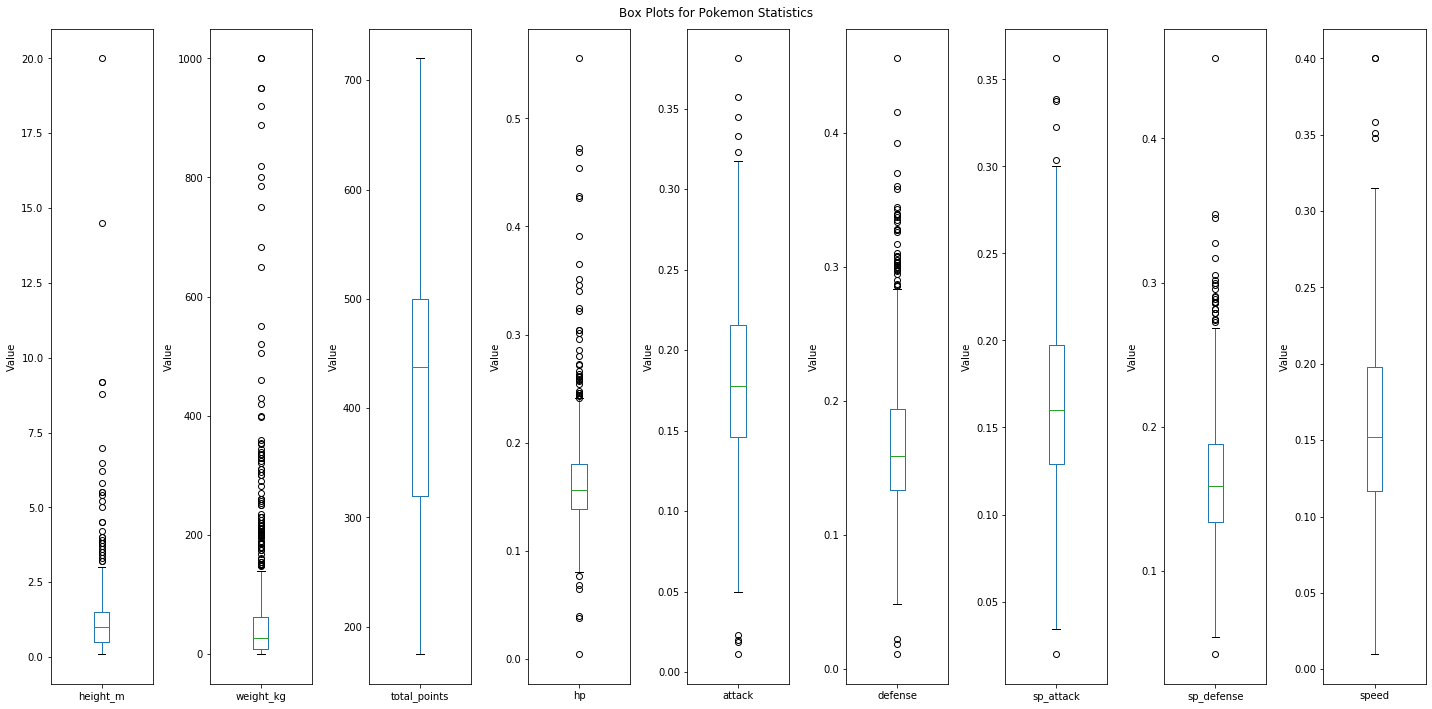

In [47]:
fig, axs = plt.subplots(1,9, figsize=(20,10))

for i, feature in enumerate(['height_m', 'weight_kg', 'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']):
    df[feature].plot(kind='box', ax=axs[i])
    axs[i].set_ylabel("Value")

fig.suptitle("Box Plots for Pokemon Statistics")
plt.tight_layout()
fig.subplots_adjust(top=0.95)

### Correlation among attributes

We can now proceed to plot the variables against each other to check if any pair is significantly related.

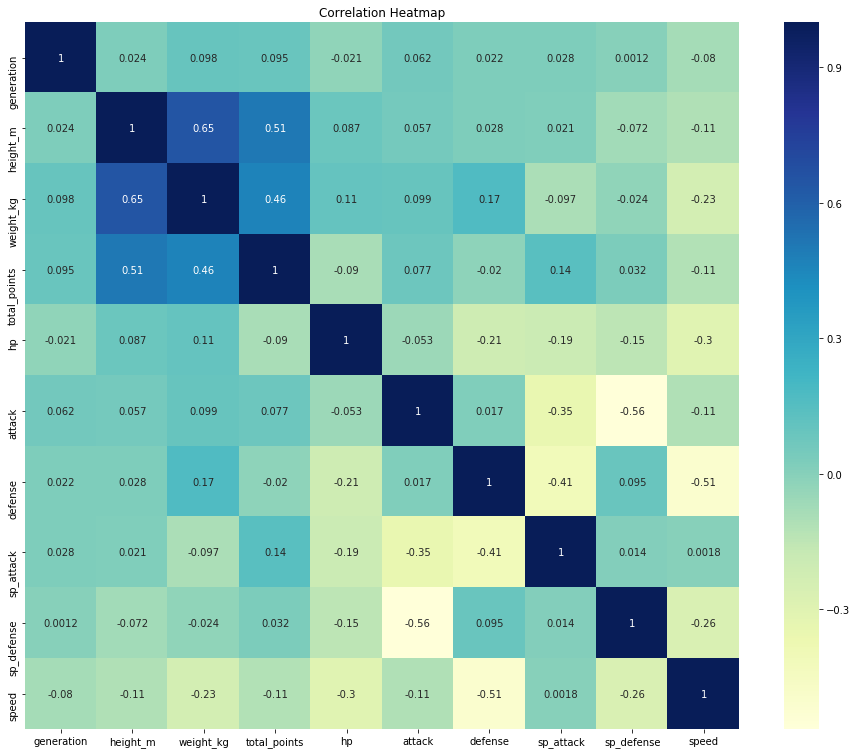

In [21]:
plt.figure(figsize = (16,13))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

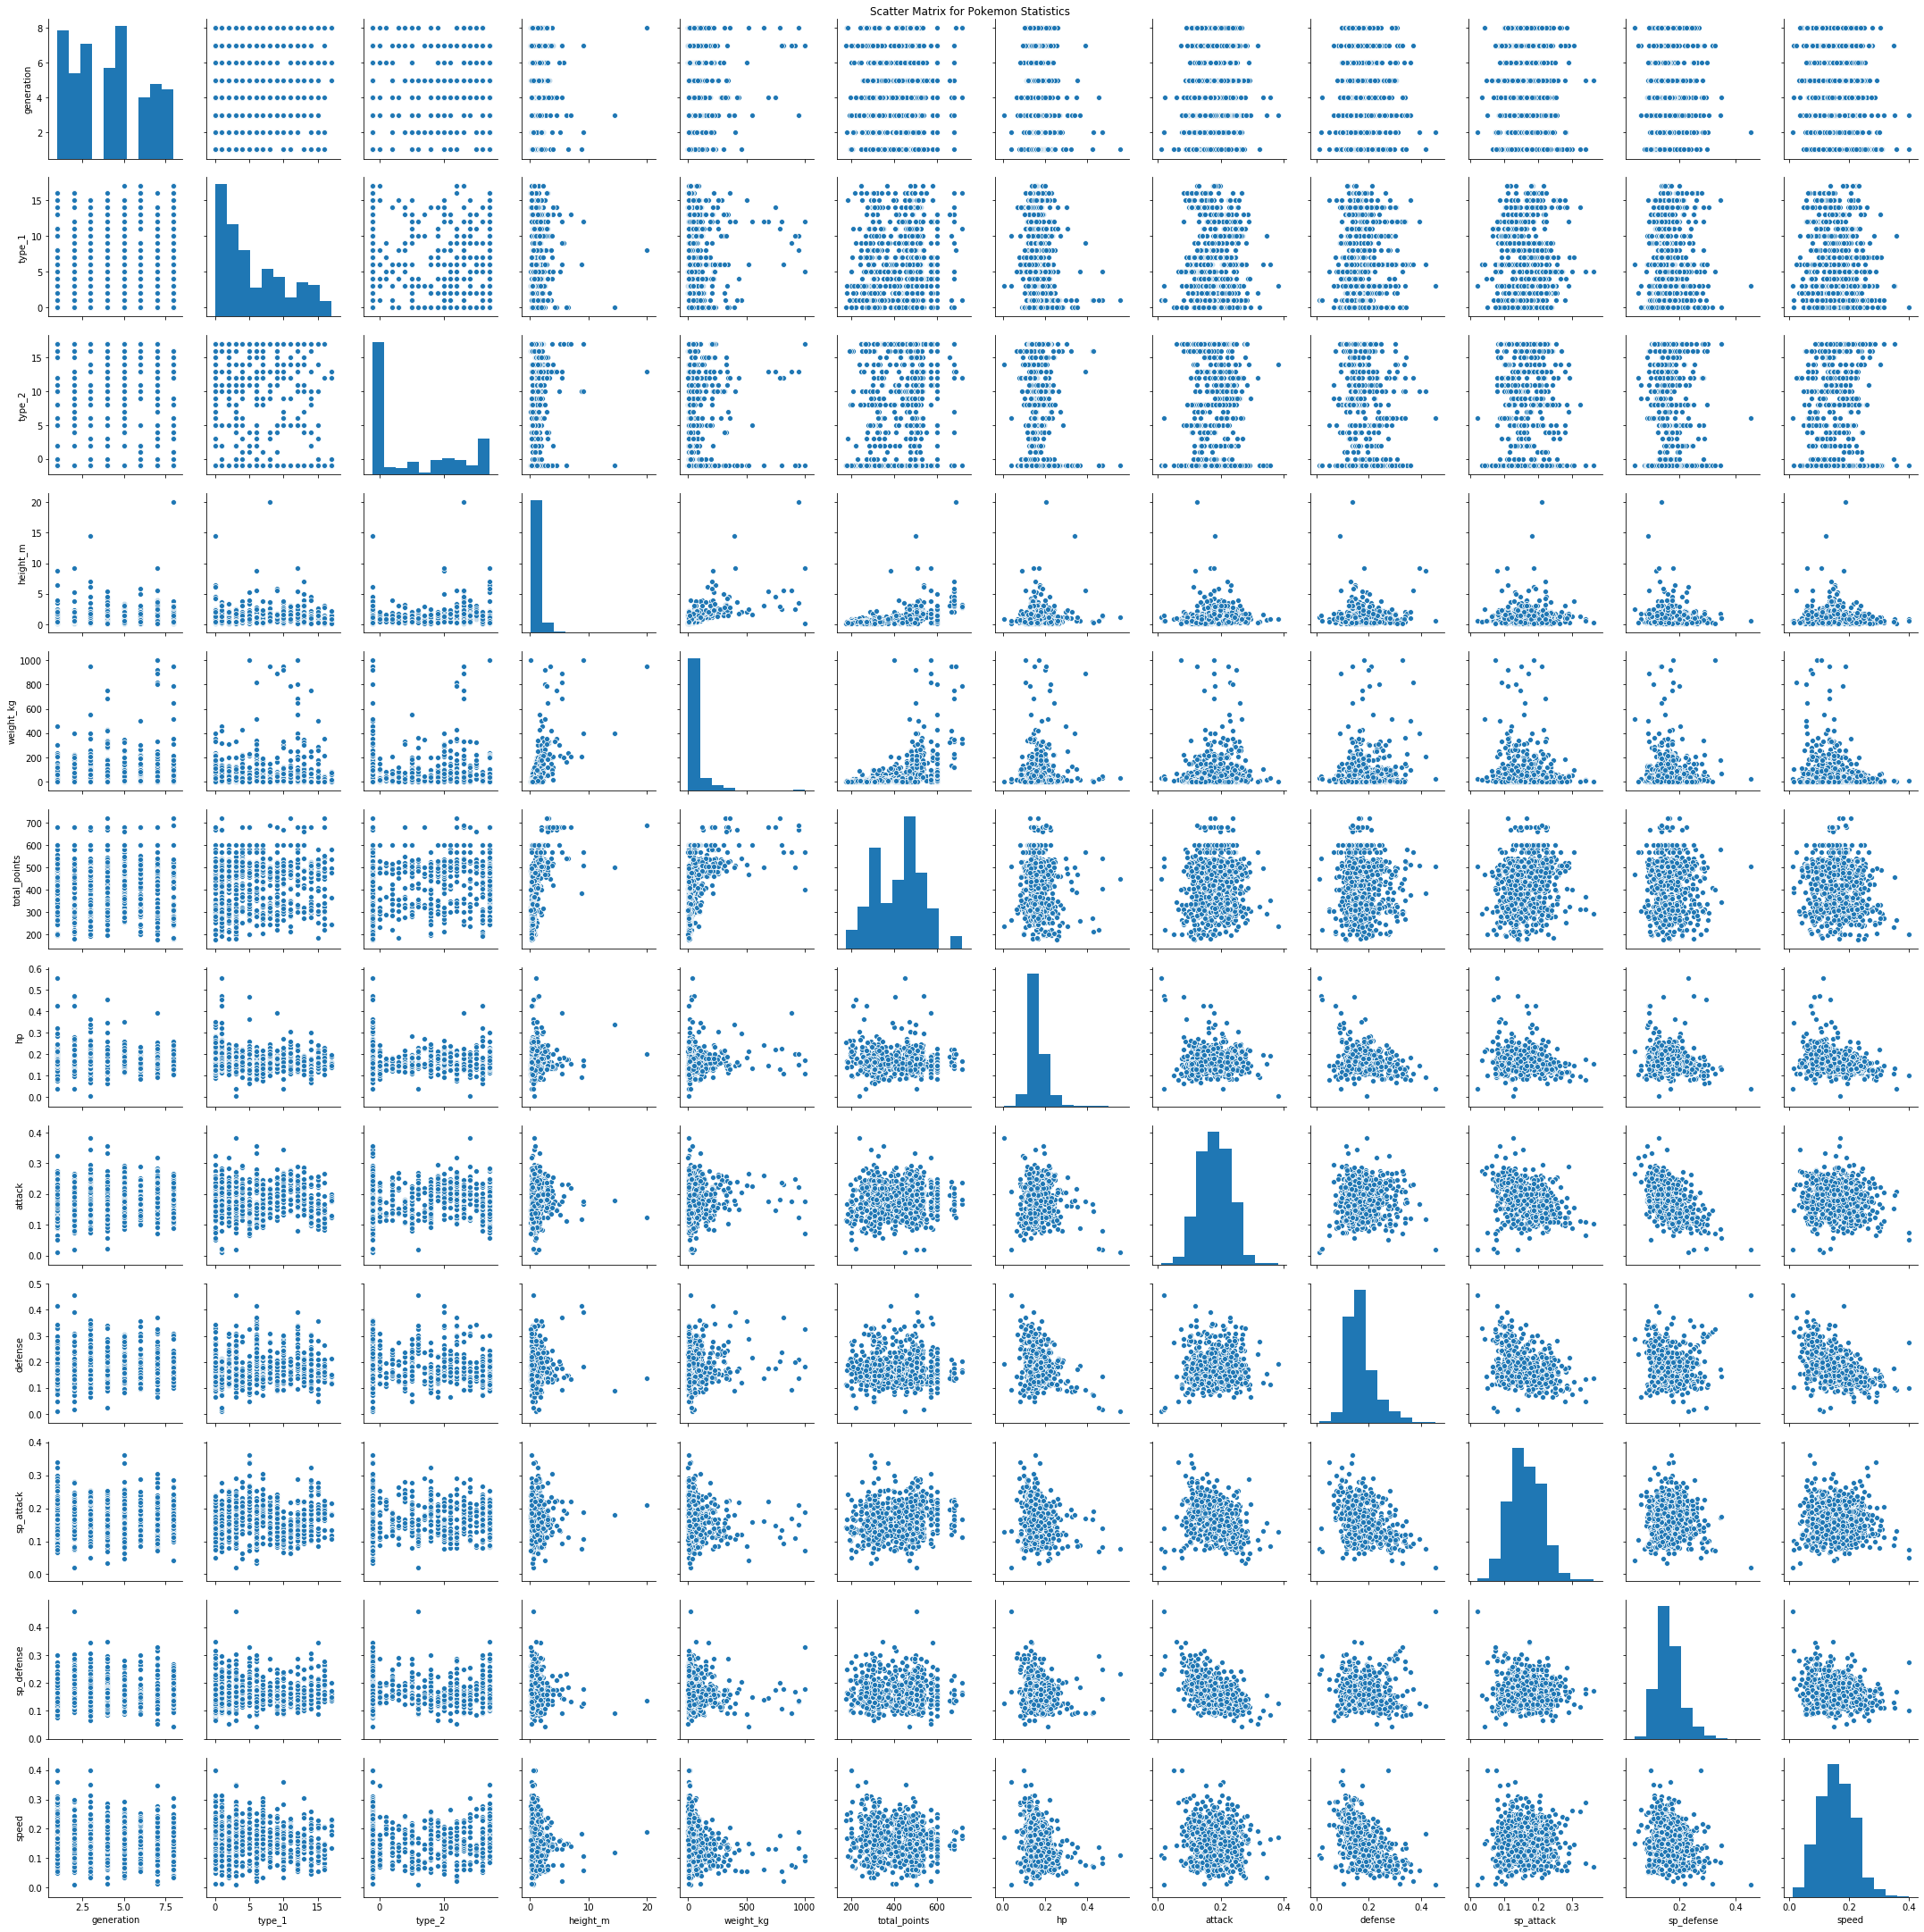

In [45]:
g = sns.pairplot(df)
g.fig.suptitle("Scatter Matrix for Pokemon Statistics", y = 1)
plt.show()

First, we see that there is quite a strong correlation between {`height`, `weight`}. This does not affect our classification because the two are not used to explain the variation in each other but instead are used in conjuction to explain something else.

The same goes for our observation that between the variables {`sp_attack`, `attack`} and {`sp_defense`, `defense`}, there also seems to be evidence of potential relationships. Once again, this does not have an impact in our case.

All other variables display little to no correlations between one another. At this point, we are able to carry continue with the anaylsis of the data.

### Correlation against type

We compared each of the above variables for each type, using median as a measure of center since the distributions are mostly skewed.

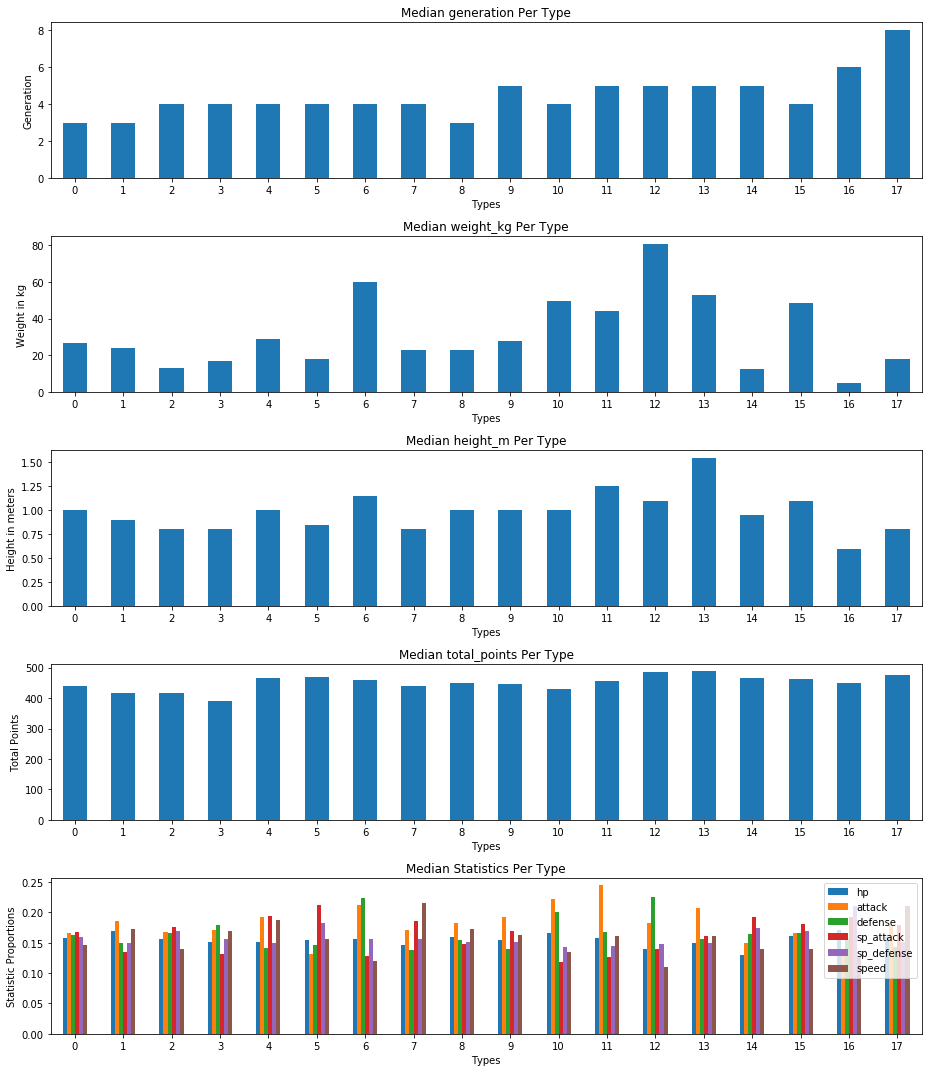

In [44]:
fig, axs = plt.subplots(5,1, figsize=(13, 15))

for i, feature in enumerate(['generation', 'weight_kg', 'height_m', 'total_points']):
    df.groupby('type_1')[feature].median().plot.bar(ax=axs[i], rot=0)
    axs[i].set_title("Median " + feature + " Per Type")
    axs[i].set_xlabel("Types")

axs[0].set_ylabel("Generation")
axs[1].set_ylabel("Weight in kg")
axs[2].set_ylabel("Height in meters")
axs[3].set_ylabel("Total Points")
last = df.groupby('type_1')['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'].median().plot.bar(ax=axs[4],legend=True, rot=0)
last.set_title("Median Statistics Per Type")
last.set_xlabel("Types")
last.set_ylabel("Statistic Proportions")
plt.tight_layout()

Median generation for each type is not as useful since it is a categorical variable, though one could say that if the median of a type is higher, the more Pokemon of that type is in later generations, and if the median is lower, then there are more in earlier generations.  

It seems like Ice, Rock, and Steel Pokemon tend to weigh the most, while Ghost, Fairy, and Bug Pokemon tend to weigh the least. This is consistent with the fact that the real-world percetptions of those types are heavier/lighter (fairies are perceived as dainty and small, so it makes sense that Fairy Pokemon would be light).

The correlation between height and type is more difficult to explain, though Bug and Fairy do tend to be shorter, with the same reasoning for weight. The median height for Fighting is highest, though many other types follow closely, so it may not be significant.

The stat distribution of Water, Grass, and Ice Pokemon seem to be the most balanced. The median attack for Fighting is the highest, as it makes sense that Fighting pokemon would have high attack power to live up to their name. Ground, Rock, and Steel seem to have the highest defense, which goes along with the notion that those things are formidable and sturdy. Electric currents travel fast, and Flying gives the impression of high agility, which can be explanations for their highest speed medians. Other notable observations are that Ghost type tends to have low health, and Fire type seems to especially be lacking in defensive stats, with, a prioritized attack, special attack, and speed.

One thing to note is that these comparisons include Pokemon with two types, while Pokemon were categorized based on their primary type (type_1).

## Data Analysis

In [24]:
type_dict = {"Water": 0,
             "Normal": 1,
             "Grass": 2,
             "Bug": 3,
             "Fire": 4,
             "Psychic": 5,
             "Rock": 6,
             "Electric": 7,
             "Poison": 8,
             "Dark": 9,
             "Ground": 10,
             "Fighting": 11,
             "Steel": 12,
             "Dragon": 13,
             "Ghost": 14,
             "Ice": 15,
             "Fairy": 16,
             "Flying": 17,}

def type_num(pokemon_type):
    return type_dict.get(pokemon_type, -1)

In [25]:
df.drop(columns=['name'], inplace=True)
df["type_1"] = df["type_1"].apply(type_num)
df["type_2"] = df["type_2"].apply(type_num)

In [26]:
train, test = train_test_split(df, test_size=0.2, random_state=0)
X_train = train.loc[:, (train.columns != 'type_1') & (train.columns != 'type_2')]
y_train = train.loc[:, (train.columns == 'type_1') | (train.columns == 'type_2')]
X_test = test.loc[:, (test.columns != 'type_1') & (test.columns != 'type_2')]
y_test = test.loc[:, (test.columns == 'type_1') | (test.columns == 'type_2')]

print(train.shape, test.shape)
print(train.columns)
print(X_train.columns)
print(y_train.columns)

(712, 12) (178, 12)
Index(['generation', 'type_1', 'type_2', 'height_m', 'weight_kg',
       'total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed'],
      dtype='object')
Index(['generation', 'height_m', 'weight_kg', 'total_points', 'hp', 'attack',
       'defense', 'sp_attack', 'sp_defense', 'speed'],
      dtype='object')
Index(['type_1', 'type_2'], dtype='object')


### Random Forest Classifer

In [27]:
rf = MultiOutputClassifier(RandomForestClassifier(n_estimators=1000, max_depth=35, max_features=1, min_samples_leaf=2, random_state=0))

print("Random Forest Classifier:")
rf.fit(X_train, y_train)
trf_score = rf.score(X_train, y_train)
print("Training Accuracy = " + str(trf_score))
rf_score = rf.score(X_test, y_test)
print("Testing Accuracy = " + str(rf_score))

Random Forest Classifier:
Training Accuracy = 0.9101123595505618
Testing Accuracy = 0.16292134831460675


### Decision Tree Classifier

In [28]:
dt = MultiOutputClassifier(DecisionTreeClassifier(max_features=5, min_samples_leaf=11, random_state=0))

print("Decision Tree Classifier:")
dt.fit(X_train, y_train)
tdt_score = dt.score(X_train, y_train)
print("Training Accuracy = " + str(tdt_score))
dt_score = dt.score(X_test, y_test)
print("Testing Accuracy = " + str(dt_score))

Decision Tree Classifier:
Training Accuracy = 0.24719101123595505
Testing Accuracy = 0.12359550561797752


### K Nearest Neighbors Classifier

In [29]:
knn = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=10))

print("K Nearest Neighbors Classifier:")
knn.fit(X_train, y_train)
tknn_score = knn.score(X_train, y_train)
print("Training Accuracy = " + str(tknn_score))
knn_score = knn.score(X_test, y_test)
print("Testing Accuracy = " + str(knn_score))

K Nearest Neighbors Classifier:
Training Accuracy = 0.15730337078651685
Testing Accuracy = 0.11797752808988764


### Support Vector Classifier

In [30]:
svc = MultiOutputClassifier(SVC(kernel="linear", random_state=0))

print("Support Vector Classifier:")
svc.fit(X_train, y_train)
tsvc_score = svc.score(X_train, y_train)
print("Training Accuracy = " + str(tsvc_score))
svc_score = svc.score(X_test, y_test)
print("Testing Accuracy = " + str(svc_score))

Support Vector Classifier:
Training Accuracy = 0.09410112359550561
Testing Accuracy = 0.09550561797752809


In order to assess whether we can classify a Pokemon’s types using its attributes, we trained several different multi-class multi-output classifiers. The classifiers we used were support vector, random forest, decision tree, and k-nearest-neighbors. The reason we chose these classifiers was that we wanted to compare different classification strategies involving decision boundaries, decision trees, and similarity measures in order to assess if certain strategies were better for the dataset. Our findings were that random forest performed the best with a training accuracy of 91.01% and test accuracy of 16.29%. 

In [31]:
print("Random Forest Classifier:")
print("Training Accuracy = " + str(trf_score))
print("Testing Accuracy = " + str(rf_score))
print()
print("Decision Tree Classifier:")
print("Training Accuracy = " + str(tdt_score))
print("Testing Accuracy = " + str(dt_score))
print()
print("K Nearest Neighbors Classifier:")
print("Training Accuracy = " + str(tknn_score))
print("Testing Accuracy = " + str(knn_score))
print()
print("Support Vector Classifier:")
print("Training Accuracy = " + str(tsvc_score))
print("Testing Accuracy = " + str(svc_score))

Random Forest Classifier:
Training Accuracy = 0.9101123595505618
Testing Accuracy = 0.16292134831460675

Decision Tree Classifier:
Training Accuracy = 0.24719101123595505
Testing Accuracy = 0.12359550561797752

K Nearest Neighbors Classifier:
Training Accuracy = 0.15730337078651685
Testing Accuracy = 0.11797752808988764

Support Vector Classifier:
Training Accuracy = 0.09410112359550561
Testing Accuracy = 0.09550561797752809


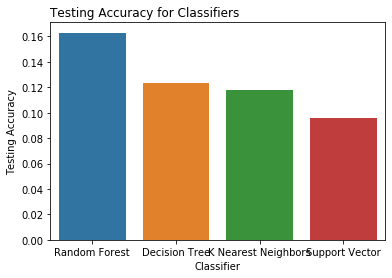

In [32]:
testing_data = {"Random Forest": rf_score, "Decision Tree": dt_score, "K Nearest Neighbors": knn_score, "Support Vector": svc_score}
test_df = pd.DataFrame(testing_data, index=[0])
ax = sns.barplot( data=test_df)
ax.set(xlabel="Classifier", ylabel="Testing Accuracy")
plt.title(label="Testing Accuracy for Classifiers", loc="left")
plt.show()

We believe that random forest had the best performance because for such a small dataset, a strategy involving an ensemble method with overfitting is likelier to have better performance than classifiers that try to learn generalizations from the training data.

# Ethics & Privacy

These Pokemon data belong to the company Nintendo, the creators of Pokemon. However, the data we have is not considered private information due to it being accessible by anyone through the video games, animated television shows, and other media the company has publicly released. The Pokemon data is considered to be fairly usable due to copyright permission. 
 
Our results reflect the original data we started with, so if the data on the websites are not canon, then our results will only be correct to the websites and not the actual Pokemon world.
 
The results that we come up with are not made in order to gain any sort of monetary merit (nor can anyone else profit), and they are not problematic for Nintendo because we are not analyzing the information in a harmful manner that will in any imaginable way cause disruption to the overall company or franchise. 

# Conclusion & Discussion

In conclusion, the objective of our project was to find a way to determine the type of a given Pokemon. We were curious to see if there was in fact a correlation between type and attribute of each Pokemon, and if the attribute of the Pokemon can consistently predict its type. We tried to find this using various methods, which included comparing the attributes, weight and height, of the Pokemon through gathering the data and standardizing it. We then were able to draw conclusions about the data through creating bar graphs and plotting line graphs. 
 
We found that there was not necessarily a correlation between attributes and the type of each Pokemon. This could be due to the fact that each Pokemon have very distinct features that are not connected to their overall type, for example, not all Ghost-type Pokemon are actually ghost-like.
most likely than not, there are little to no connections for most Pokemon and their respective types. The attributes of these Pokemon were probably made in regards to the overall character design rather than with the thought of it being directly related to their type.
 
This information could be used for those who are curious to make a strong and effective Pokemon team when they battle against others. In a way, it is helpful to note that the physical attributes of these Pokemon do not determine what type that it is, which in turn, the trainer does not need to take into account the attributes of these Pokemon as a factor when picking their Pokemon team. It is one less thing to worry about and they really only need to be focused on their stats and type and power rather than their weight and height and other factors that solely contribute to their appearances.

# Team Contributions

Chris - Data Cleaning  
Chloe - Conclusion  
Kevin -  EDA  
Tiffany - Ethics, hypothesis  
Mark - Data Analysis and Results  